In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def runge(x):
    return 1 / (1 + 25 * x**2)

x_points_10 = list(np.linspace(-1, 1, 11))
y_points_10 = [runge(current) for current in x_points_10]

x_points_4 = list(np.linspace(-1, 1, 5))
y_points_4 = [runge(current) for current in x_points_4]

def lagrance_poly(x_points, y_points, x):
    result = 0

    for i in range(len(x_points)):
        term = y_points[i]
        for j in range(len(x_points)):
            if i != j:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        result += term
    return result

In [26]:
x_range = np.linspace(-1, 1 , 100)
runge_values = [runge(current) for current in x_range]
appr_values_10 = [lagrance_poly(x_points_10, y_points_10, current) for current in x_range]
appr_values_4 = [lagrance_poly(x_points_4, y_points_4, current) for current in x_range]

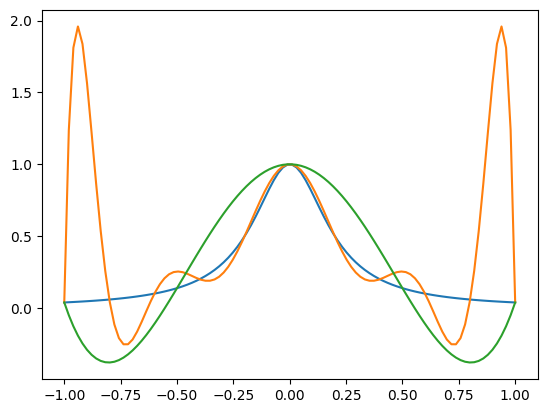

In [27]:
plt.plot(x_range, runge_values)
plt.plot(x_range, appr_values_10)
plt.plot(x_range, appr_values_4)
plt.show()

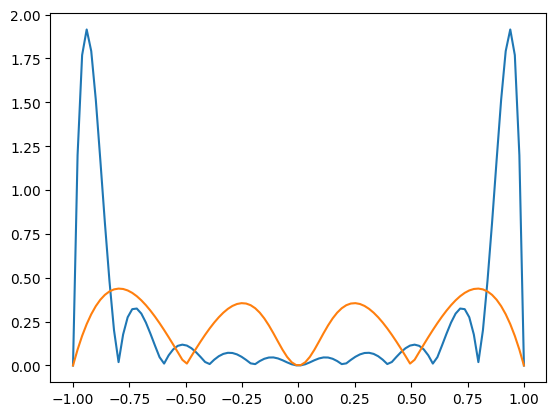

In [28]:
plt.plot(x_range, abs(runge(x_range) - lagrance_poly(x_points_10, y_points_10, x_range)))
plt.plot(x_range, abs(runge(x_range) - lagrance_poly(x_points_4, y_points_4, x_range)))
plt.show()